# Homework Week 11

In [1]:
#Handy imports from class

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly.express as px
from scipy import signal

df = pd.read_csv('temperature.csv')

In [2]:
df['datetime'] = pd.to_datetime(df['datetime']) #make some calculations easier later on
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


### 1. Write a function that efficiently converts every column to a different temperature scale

In [3]:
# function to convert temperature to different scale
# returns nothing, just applies changes to dataframe
# it's very, very slow
# I think the run time for this is O(n^2)

# I think there is a better way to do this, but I had a hard time dealing with Nan values
# something with .apply() and a lambda function?

def convertTemptoC(df):
    for column in df:
       # print(column)  #debugging to make sure program was working
        if column != 'datetime':
            for i in range(len(df[column])):
                if df.loc[i, column] != 'NaN':
                    df.loc[i, column] =  df.loc[i, column] - 273.15
        
    pass



In [4]:
convertTemptoC(df)

In [5]:
df.head(10)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
1,2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2,2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
3,2012-10-01 15:00:00,11.476998,8.941866,16.310618,8.639833,18.712844,18.393355,20.242177,23.481487,12.083952,...,12.606824,15.176940,12.697790,14.081672,34.241513,31.131841,37.261538,31.25,31.25,30.35
4,2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,...,12.700440,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35
5,2012-10-01 17:00:00,11.472911,8.959095,16.281869,8.625065,18.702162,18.413063,20.220249,23.527445,12.242738,...,12.794057,15.335467,12.724069,14.172831,33.748887,31.044188,37.093077,31.25,31.25,30.35
6,2012-10-01 18:00:00,11.470868,8.967710,16.267494,8.617681,18.696821,18.422917,20.209284,23.550424,12.322132,...,12.887673,15.414730,12.737208,14.218410,33.502574,31.000361,37.008846,31.25,31.25,30.35
7,2012-10-01 19:00:00,11.468824,8.976324,16.253119,8.610297,18.691480,18.432772,20.198320,23.573403,12.401525,...,12.981290,15.493994,12.750348,14.263990,33.256261,30.956534,36.924615,31.25,31.25,30.35
8,2012-10-01 20:00:00,11.466781,8.984939,16.238745,8.602912,18.686139,18.442626,20.187356,23.596381,12.480919,...,13.074906,15.573257,12.763487,14.309569,33.009948,30.912708,36.840385,31.25,31.25,30.35
9,2012-10-01 21:00:00,11.464738,8.993553,16.224370,8.595528,18.680798,18.452480,20.176392,23.619360,12.560312,...,13.168522,15.652521,12.776627,14.355149,32.763635,30.868881,36.756154,31.25,31.25,30.35


### 2. Write a function that efficiently fills in missing values in every column, except for trailing NANs.  

That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end

In [6]:
# my function to interpolate only data that is missing between timestamps
# input the temperature dataframe
def myInterpolate(df):
    for column in df:
        if df[column].dtype == 'float64':  #ignores 'datetime' column
            x = df['datetime']   #sets up x
            knowns = df.loc[~df[column].isnull(), ['datetime', column]] #only known values for x
            xp = knowns['datetime']  # x's where temp is known
            fp = np.array(knowns[column]) # array of known temps

            #find the where null values are at the end
            xEndLocation = knowns.index[-1] #last value index
            xEndTime = knowns['datetime'].loc[xEndLocation] #find the timestamp of last value
            xEndIndex = x[x == xEndTime].index[0] # find the right index in x with the last stamp value
            # end x when data collection stopped
            x = x[:xEndIndex +1] # re write x to only be the values needed before end of data
            
            # linear interpolate
            temp = pd.DataFrame({'datetime':x, column: np.interp(x, xp, fp)})
            df[column] = temp[column]  # rewrites column with known and interpolated values

    pass  #returns nothing, but I guess maybe it could return a new/changed dataframe, keeping the original


In [7]:
myInterpolate(df)  # run function

In [8]:
df.info()  # test to see fewer null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           45253 non-null  datetime64[ns]
 1   Vancouver          44461 non-null  float64       
 2   Portland           45253 non-null  float64       
 3   San Francisco      44461 non-null  float64       
 4   Seattle            45253 non-null  float64       
 5   Los Angeles        45253 non-null  float64       
 6   San Diego          45253 non-null  float64       
 7   Las Vegas          45253 non-null  float64       
 8   Phoenix            45253 non-null  float64       
 9   Albuquerque        45253 non-null  float64       
 10  Denver             45253 non-null  float64       
 11  San Antonio        45253 non-null  float64       
 12  Dallas             45253 non-null  float64       
 13  Houston            45253 non-null  float64       
 14  Kansas

### 3. Find cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average

Minneapolis, City A, and Seattle, City B, meet this criteria. 

I looked at the fluctuations in mean temperatures for January and July for all data for each city.  Minneapolis stood out as an extreme city with cold winters and warm summers.   I took a look at the data table to determine that Seattle was more moderate in both winter and summer than Minneapolis.

My guess is that there is also a way to program python to comb over the data to find more pairs by comparing every city to each other.

In [9]:
# add month to data
df['month'] = pd.DatetimeIndex(df['datetime']).month
# create new dataframe with mean temperatures for each month in each city
meanTemps = df.groupby('month').mean()
meanTemps

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
month,,,,,,,,,,,,,,,,,,,,,
1,3.435788,3.583184,10.306387,4.439315,12.410479,12.294258,7.159599,11.052732,0.768558,-0.810886,...,-0.366284,-0.544556,-7.531094,-1.129288,9.676390,13.131093,12.933201,14.734705,13.424599,11.584828
2,4.786693,6.009428,11.837995,5.965783,13.581205,13.408241,10.672674,14.221805,4.605794,0.751375,...,-0.053385,-0.570637,-8.314496,-1.181000,11.068370,13.977349,14.360675,15.733167,14.515501,13.275471
3,7.004971,8.547859,13.281086,7.924323,15.484351,14.967418,15.584367,18.669744,9.366877,5.005620,...,4.116506,3.611908,-3.372896,1.804295,14.466751,17.103544,18.649513,17.569916,16.849698,16.286384
4,9.658979,10.667127,14.309154,10.183814,16.477184,15.795891,18.437181,21.416349,12.502280,7.837653,...,11.838592,10.912340,5.690933,8.752631,17.837048,19.475873,22.109726,19.596919,18.973046,18.899545
5,13.721250,14.565237,15.841685,13.941708,17.844683,17.073795,22.915887,25.469910,16.219486,12.128960,...,16.995285,16.567402,14.514433,14.268257,21.487096,22.862348,26.808820,23.231854,21.658142,22.466104
6,16.228408,17.353580,17.856091,16.436508,20.871611,19.346028,30.825529,32.382617,23.537798,19.773068,...,21.969453,21.472517,18.123033,19.023164,23.620367,25.784896,29.918025,26.187915,24.534001,24.728246
7,18.976039,20.324855,19.471702,18.904024,23.275532,21.837232,33.118570,34.089266,23.380025,22.136624,...,24.483993,24.671355,21.150587,22.798143,24.899009,27.691867,32.403981,28.441589,26.991664,26.468820
8,19.105956,20.783623,18.860339,19.186526,23.224908,22.037755,30.577005,32.359030,20.943886,20.260002,...,22.667694,23.239140,19.899933,21.567423,25.573878,28.820355,32.099268,29.190679,27.642314,27.644784
9,15.277139,16.835510,18.967253,15.686096,22.743929,21.676691,25.986552,28.951604,18.680166,17.173915,...,19.714279,20.137326,16.896735,18.598153,23.841327,27.680170,29.499690,28.489179,26.569534,26.102741


In [10]:
# find the mean temperature difference for each city between Jan and July
tempVariation = meanTemps.loc[7] - meanTemps.loc[1]

#find the cities with the most temperature fluctuation
cityMax = tempVariation[tempVariation == tempVariation.max()].index[0]
cityMin = tempVariation[tempVariation == tempVariation.min()].index[0]
print('Most temp difference ', cityMax)
print('Least temp difference ', cityMin)

# Miami gets hotter summers than Minneapolis.   Looked at data to find a fit for city B.
# Seattle is not as hot as Minneapolis in July and not as cold in January
# check city data
meanTemps[['Seattle', 'Minneapolis']]

Most temp difference  Minneapolis
Least temp difference  Miami


,Seattle,Minneapolis
month,,
1,4.439315,-8.969970
2,5.965783,-8.002463
3,7.924323,-0.271653
4,10.183814,7.238447
5,13.941708,14.398713
6,16.436508,20.179466
7,18.904024,22.179521
8,19.186526,20.841638
9,15.686096,17.789072


### 4. For the two cities you found in for problem 4 (there are many possible answers), clean up the data via aggregation or rolling averages and plot a clear visual

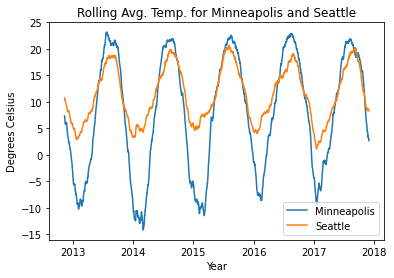

In [11]:
fig, ax = plt.subplots()
ax.plot(df['datetime'], df['Minneapolis'].rolling(1000).mean(), label = 'Minneapolis')
ax.plot(df['datetime'], df['Seattle'].rolling(1000).mean(), label = 'Seattle')
ax.legend()
plt.title('Rolling Avg. Temp. for Minneapolis and Seattle')
plt.xlabel('Year')
plt.ylabel('Degrees Celsius');